# Segundo examen parcial
Alisson García Mejía

Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

1. Dataset de Coactivation matrix
    - Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
    - Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

In [186]:
import pandas as pd
import scipy
import scipy.io as loadmat
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

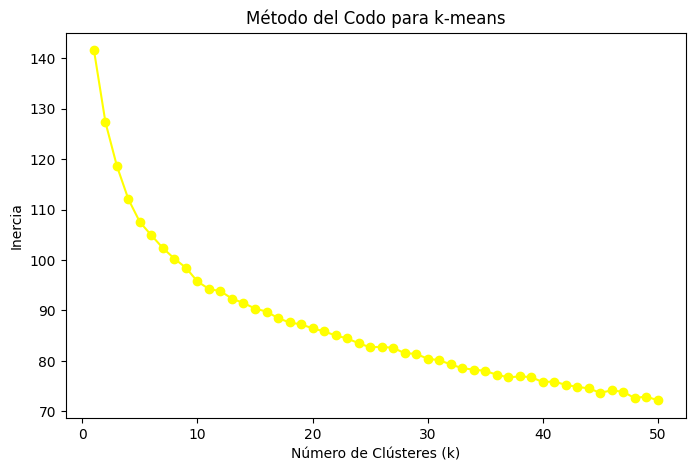

In [187]:
mat_path = r'/Users/alisson/PycharmProjects/Neurociencias-2025-2/S03_datasets/coactivation_matrix/Coactivation_matrix.mat'
mat_json = scipy.io.loadmat(mat_path)
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict.keys()
df_co = pd.DataFrame(mat_dict['Coactivation_matrix']) #para convertirlo a un dataframe

# Método de codo
inertia = []
k_range = range(1, 51) #valores de k de 1 a 50

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_co)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='yellow')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para k-means')
plt.show()

In [188]:
# En la gráfica, podemos ver visualmente en la gráfica que la curva de inercia empieza a disminuir más lentamente a partir de 10 clusters
# Pero si queremos detectar el codo automáticamente...
from kneed import KneeLocator

knee = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')

print(f'Número de clusters: {knee.elbow}')


Número de clusters: 13


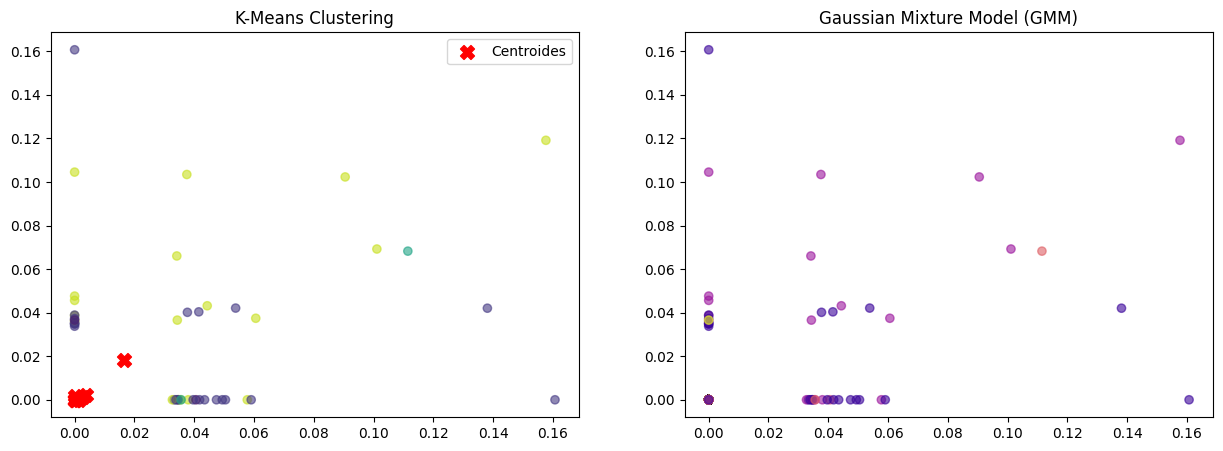

In [189]:
# Para convertir todos los datos a str y poder aplicar kmeans
df_co.columns = df_co.columns.astype(str)

k_optimo = 13 #número que obtuvimos anteriormente
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df_co['kmeans_cluster'] = kmeans.fit_predict(df_co)

#Aplicamos Gaussian Mixture Model
gmm = GaussianMixture(n_components=k_optimo, random_state=42)
df_co['gmm_cluster'] = gmm.fit_predict(df_co)

#Para visualizar los resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#k-means
axes[0].scatter(df_co.iloc[:, 0], df_co.iloc[:, 1], c=df_co['kmeans_cluster'], cmap='viridis', alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroides')
axes[0].set_title('K-Means Clustering')
axes[0].legend()

# GMM
axes[1].scatter(df_co.iloc[:, 0], df_co.iloc[:, 1], c=df_co['gmm_cluster'], cmap='plasma', alpha=0.6)
axes[1].set_title('Gaussian Mixture Model (GMM)')

plt.show()

Cada punto representa una muestra de datos, los colores indican a qué cluster pertenece cada punto, los centroides (X roja) representa el centro de cada clúster. Un cluster bien separado es porque k-means funciona bien y están bien distribuidos, cuando hay solapamiento, indica que los datos no son perfectamente esféricos (en ese caso, GMM es mejor).

2. Brain tumor

    A. Utilizar el método de codo para determinar el número de clusters ópticmo (adecuado)

    B. Utilizar 2 clusters con cada método (K-means, gaussian clusters y cluster jerárquico) y cálcular la matriz de confusión de cada método usando la columna 'class' como groundthruth

    C. ¿Qué método recomendarías para este datset? ¿Por qué?

In [190]:
path_brain = r'/Users/alisson/PycharmProjects/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv'
df = pd.read_csv(path_brain)
print(df.head())
print(df.shape)

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

In [191]:
X = df.iloc[:, 2:-1]
# datos normalizados
X_norm = (X - X.mean()) / X.std()

In [192]:
k_range = range(1, 11)
inertia = []

for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_norm)
        inertia.append(kmeans.inertia_)

# Para verificar las longuitudes de k_range e inertia. Ambos deben coincidir
print(f'Valores en k_range: {len(list(k_range))}')
print(f'Valores en inertia: {len(inertia)}')


Valores en k_range: 10
Valores en inertia: 10


Número óptimo de clústeres: 4



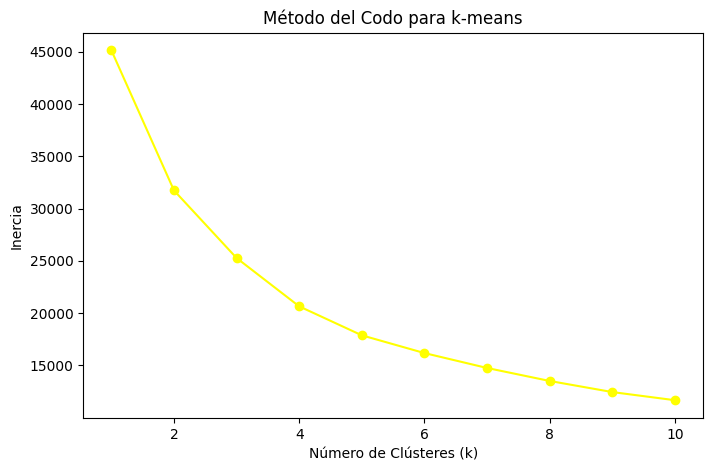

In [193]:
# Ahora si podemos encontrar el número óptimo de clústers
knee = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
print(f'Número óptimo de clústeres: {knee.elbow}\n')

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='yellow')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para k-means')
plt.show()

In [194]:
y_true = df['Class']
X = df.drop(columns=['Class'])

# Paso 3: Preprocesamiento → Solo columnas numéricas
X = X.select_dtypes(include=['float64', 'int64'])


In [195]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
import seaborn as sns
# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_norm)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
y_gmm = gmm.fit_predict(X_norm)

# Clustering jerárquico
agg = AgglomerativeClustering(n_clusters=2)
y_agg = agg.fit_predict(X_norm)

y_pred = agg.fit_predict(X_norm)


In [196]:
from sklearn.metrics import accuracy_score

def ajustar_labels(y_pred, y_true):
    acc1 = accuracy_score(y_true, y_pred)
    acc2 = accuracy_score(y_true, 1 - y_pred)
    return y_pred if acc1 > acc2 else 1 - y_pred

y_pred = ajustar_labels(y_pred, y_true)


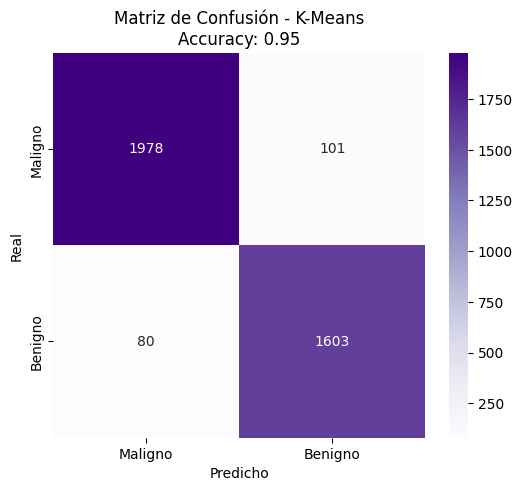

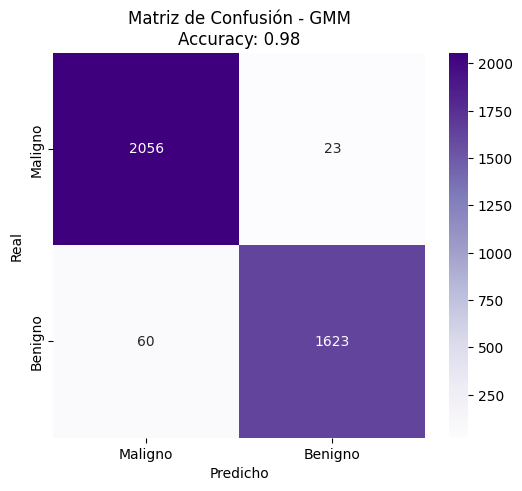

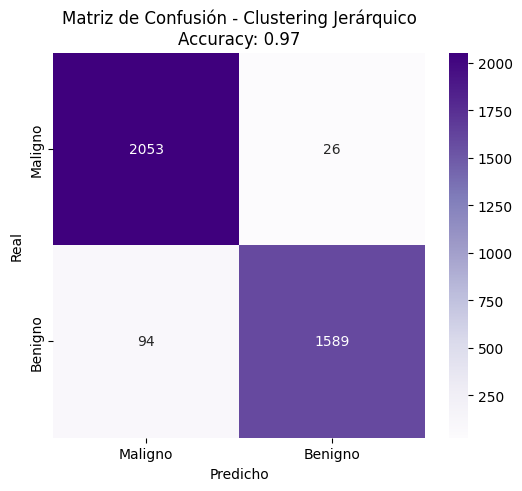

In [197]:
# Ajustar predicciones
y_kmeans = ajustar_labels(y_kmeans, y_true)
y_gmm = ajustar_labels(y_gmm, y_true)
y_agg = ajustar_labels(y_agg, y_true)

# Crear función para graficar
def plot_confusion(y_pred, y_true, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))

    acc = accuracy_score(y_true, y_pred)
    labels = ['Maligno', 'Benigno']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
    plt.title(f"{title}\nAccuracy: {acc:.2f}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# Mostrar matrices
plot_confusion(y_kmeans, y_true, 'Matriz de Confusión - K-Means')
plot_confusion(y_gmm, y_true, 'Matriz de Confusión - GMM')
plot_confusion(y_agg, y_true, 'Matriz de Confusión - Clustering Jerárquico')



C. ¿Qué método recomendarias para este dataset? ¿Por qué?

Al ser un dataset pequeño, el cluster jerárquico funciona bien con 15 muestras, no requerimos reducir la dimensionalidad con PCA, como lo sería en el caso de kmeans y GMM. Aunque con el el método GMM, este modela clústers más realistas y no es tan rígido como el jerárquico.
Así que por cuestiones de preprocesameinto, el cluster jerárquico es una buena opción para identificar visualmente las relaciones entre muestras, teniendo un dataset "pequeño". Pero para su propósito, el cluster jerárquico tal vez no sea el mejor método para determinar con certeza si alguien tiene un tumor o no, en este caso GMM nos permitiría ver que, si hay un solapamiento, le da una pertenencia a cada grupo y la gestiona mejor que k-means y e incluso nos permite hacer predicciones con certeza.


3. De su previa investigación

A. **¿Qué es precisión?**

    Es la métrica que mide la exactitud de las predicciones positivas de un modelo, nos permite evaluar el rendimiento de dicho modelo. Se expresa como porcentaje y se calcula dividiendo el número de verdaderos positivos entre la suma de verdaderos y falsos positivos. Es muy útil cuando los errores de predicción pueden ser costosos (como en un diagnóstico médico).

B. **¿Qué es accuracy?**

    Es el porcentaje total de casos clasificados correctamente, es una métrica importante para evaluar la eficacia de un algoritmo para generar resultados deseados. Con este porcentaje también se puede medir los errores generales que generó el algoritmo. En Scikit-Learn implementa la métrica sklearn.metrics.accuracy_score para que nos devuelva el porcentaje de predicciones correctas. También ir de 0 a 1, donde 1 sería que todas las muestras está bien clasificadas.

C. **¿Qué es Recall?**

    Otra métrica importante para cuantificar la eficacia de un algoritmo, es el porcentaje de casos identificados correctamente como positivos del total de positivos verdaderos. Por ejemplo, en el caso del dataset brain_tumor para identificar si alguien tiene un tumor maligno o beningno, buscamos un mayor Recall para descartar falsos positivos

D. **¿Qué es F1-score?**

    Es una métrica fundamental para evaluar los modelos de clasificación. Es la media armónica entre Accuracy y Recall, varía de 0 a 1 donde 1 es la mejor puntuación para el rendimiento general del modelo. Se usa en problemas de clasificación binaria

4. **¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?**

    La matriz de confusión tiene 4 elementos: Verdaderos Positivos (TP), Falsos negativos (TN), Falsos positivos (FP) y Falsos Negativos (FN) donde a partir se definen los anteriores conceptos, donde:

* Precisión: mide la exactitud de las predicciones positivas (cuáles son las verdaderas positivas)
* Recall: medir la capacidad para identificar cuántos de los verdaderos positivos fueron identificados correctamente
* Accuracy: Mide el porcentaje de predicciones correctas, tanto positivas como negativas respecto al total de predicciones realizadas
* F1-score: balancea entre accuracy y recall, especialmente en datos que están desbalanceados



5. A partir de los datos calculados en 2B. Calcular precisión, accuracy, recall y f1-score

In [198]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")

Precisión: 0.98
Recall: 0.94
Exactitud (Accuracy): 0.97
F1-score: 0.96
